# TF-IDF: Term frequency Inverse Document Frequency on Snopes Data

In [40]:
import pandas as pd

In [41]:
# data = pd.read_csv('Final Data/SnopesData5050.csv')

data = pd.read_csv('Final Data/SnopesDataGeneric.csv', encoding = "latin1")

# 2 -> Other / Mixture/ All other labels
# 1 -> Fake / False
# 0 -> Not Fake / True

In [42]:
data.head()

,ID,Post,Label
0,1,Did Doctors Recommend Genital COVID-19 Vaccina...,FALSE
1,2,Is the Age of Consent Being Lowered to 4?,FALSE
2,3,Hawaii Official Says No Birth Certificate for ...,FALSE
3,4,Trump Leaks Classified Info After Intelligence...,FALSE
4,5,Did Jack Johnson Invent the Monkey Wrench?,Mixture


In [43]:
# For binary classsification

label = { 'FALSE': 0, 'TRUE': 1, 'Mixture': 1 } 

data.Label = [label[item] for item in data.Label]

In [44]:
data['Label'].unique()

array([0, 1], dtype=int64)

In [45]:
data['Label'].value_counts()

0    2254
1    1683
Name: Label, dtype: int64

In [46]:
# Remove label from data

X = data.drop(['ID', 'Label'], axis = 1)
X.head()

,Post
0,Did Doctors Recommend Genital COVID-19 Vaccina...
1,Is the Age of Consent Being Lowered to 4?
2,Hawaii Official Says No Birth Certificate for ...
3,Trump Leaks Classified Info After Intelligence...
4,Did Jack Johnson Invent the Monkey Wrench?


In [47]:
# Store results

Y = data['Label']
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Label, dtype: int64

In [48]:
X.shape, Y.shape

((3937, 1), (3937,))

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
messages = data.copy()

In [51]:
messages['Post'][0]

'Did Doctors Recommend Genital COVID-19 Vaccination Injections for Men?'

In [52]:
# Stemming and stop word removal

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
#     type(messages['title'][i])
    review = re.sub('[^a-zA-Z]', ' ', str(messages['Post'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [53]:
corpus

['doctor recommend genit covid vaccin inject men',
 'age consent lower',
 'hawaii offici say birth certif presid obama',
 'trump leak classifi info intellig brief',
 'jack johnson invent monkey wrench',
 'russia releas lion enforc covid lockdown',
 'steve bannon predict obama offici would end jail',
 'immin chang introduc texa insur law midst harvey',
 'oregon becom first state legal molli',
 'pussi quip',
 'hand sanit combust left hot car',
 'sharia law establish texa',
 'zello phone app work without internet',
 'presid obama declin lay wreath memori day',
 'hillari clinton wear defibril',
 'fake tweet donald trump',
 'phone number track coronaviru stimulu payment',
 'student conceal handgun stop mass stab texa colleg',
 'congress vote sell apach land foreign corpor',
 'walmart give profit trump campaign',
 'curb enthusiasm film season covid pandem',
 'girl impregn teenag ejacul pool',
 'somali muslim take small tennesse town',
 'dalla shooter identifi neo nazi jeffrey harri',
 'c hig

In [54]:
# Applying TFIDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features = 5000, ngram_range = (1, 3))
X = tv.fit_transform(corpus).toarray()

In [55]:
Y = messages['Label']

In [56]:
# Train and Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [57]:
tv.get_feature_names()[:10]

['aaron',
 'abandon',
 'abc',
 'abduct',
 'abduct warn',
 'abort',
 'abort time',
 'abort time give',
 'abraham',
 'abraham lincoln']

In [58]:
tv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [59]:
count_data = pd.DataFrame(X_train, columns = tv.get_feature_names())

In [60]:
count_data.head()

,aaron,abandon,abc,abduct,abduct warn,abort,abort time,abort time give,abraham,abraham lincoln,...,yet,york,york citi,york polic,young,young girl,younger,zealand,zika,zuckerberg remov
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
import matplotlib.pyplot as plt

In [62]:
# Custom Confusion matrix plotter

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [63]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

In [64]:
from sklearn import metrics
import numpy as np
import itertools

Multinomial Naive Bayes Accuracy:   0.687
Confusion matrix, without normalization


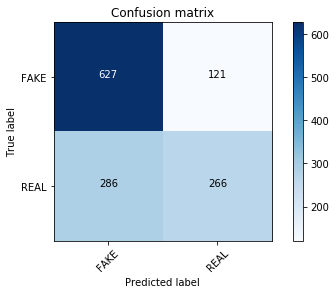

In [65]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Multinomial Naive Bayes Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

In [66]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:    %0.3f" % score)

Accuracy:    0.687


In [67]:
# Passive Aggressive Classifier Algorithm

from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier()

Passive Agressive Classifier Accuracy:   0.668
Confusion matrix, without normalization


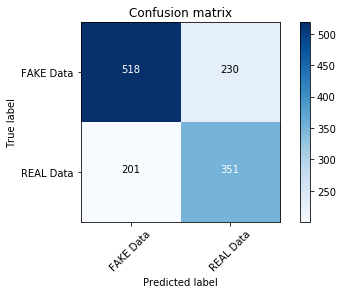

In [68]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Passive Agressive Classifier Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE Data', 'REAL Data'])

In [69]:
# Multinomial Classifier with Hyperparameter tuning

classifier = MultinomialNB(alpha = 0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Akash Selvakumar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.683076923076923
Alpha: 0.1, Score : 0.6861538461538461
Alpha: 0.2, Score : 0.6823076923076923
Alpha: 0.30000000000000004, Score : 0.6807692307692308
Alpha: 0.4, Score : 0.6838461538461539
Alpha: 0.5, Score : 0.686923076923077
Alpha: 0.6000000000000001, Score : 0.69
Alpha: 0.7000000000000001, Score : 0.69
Alpha: 0.8, Score : 0.6907692307692308
Alpha: 0.9, Score : 0.6861538461538461


In [70]:
# Best: Alpha 0.8 Score = 0.6907

In [71]:
# Get Features names
feature_names = tv.get_feature_names()

In [72]:
classifier.coef_[0]

array([-9.01013067, -8.65718797, -9.01013067, ..., -8.42983503,
       -8.25853136, -9.01013067])

In [73]:
# Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:10]

[(-5.482844516521119, 'covid'),
 (-5.55500187142516, 'trump'),
 (-6.3656617383320775, 'clinton'),
 (-6.406739253432724, 'say'),
 (-6.453835949957097, 'peopl'),
 (-6.545343311456668, 'vaccin'),
 (-6.547765582241934, 'protest'),
 (-6.5675611522254895, 'polic'),
 (-6.583401162959256, 'obama'),
 (-6.644856241899977, 'hillari clinton')]

In [74]:
# Most fake
sorted(zip(classifier.coef_[0], feature_names))[:10]

[(-9.010130666656925, 'aaron'),
 (-9.010130666656925, 'abc'),
 (-9.010130666656925, 'abduct'),
 (-9.010130666656925, 'abduct warn'),
 (-9.010130666656925, 'accept'),
 (-9.010130666656925, 'accid'),
 (-9.010130666656925, 'across'),
 (-9.010130666656925, 'actual'),
 (-9.010130666656925, 'address'),
 (-9.010130666656925, 'adolf')]